<a href="https://colab.research.google.com/github/surbhisaxena11/data_sc/blob/main/Covid19_Surbhi_Saxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df=pd.read_csv('covid19_rawdata.csv')

In [ ]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


# New Section

In [7]:
df.rename(columns={'Country/Region': "Country"}, inplace=True)
df

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [8]:
world = df.groupby("Country")[['Confirmed','Recovered','Deaths']].sum().reset_index()
world.head()

,Country,Confirmed,Recovered,Deaths
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,13464399.0,669075.0
3,Albania,19768869.0,13945256.0,375955.0
4,Algeria,27684358.0,18959299.0,834464.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



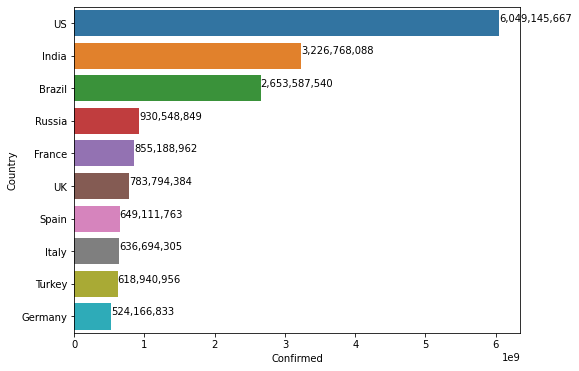

In [9]:
### Top 10 countries with maximum number of confirmed cases
top_10 = world.sort_values(by=['Confirmed'], ascending=False).head(10)
### Barplot
plt.figure(figsize=(8,6))
plot = sns.barplot(top_10['Confirmed'], top_10['Country'])
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



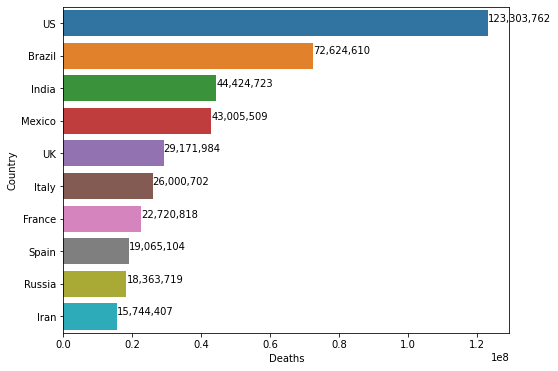

In [10]:
### Top 10 countries with maximum number of deaths
top_d10 = world.sort_values(by=['Deaths'], ascending=False).head(10)
### Barplot
plt.figure(figsize=(8,6))
plot = sns.barplot(top_d10['Deaths'], top_d10['Country'])
for i,(value,name) in enumerate(zip(top_d10['Deaths'],top_d10['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [11]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Deaths', hover_name='Country', color_continuous_scale='teal', range_color=[1,1000000],title='Countries with Maximum number of Deaths')
figure.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



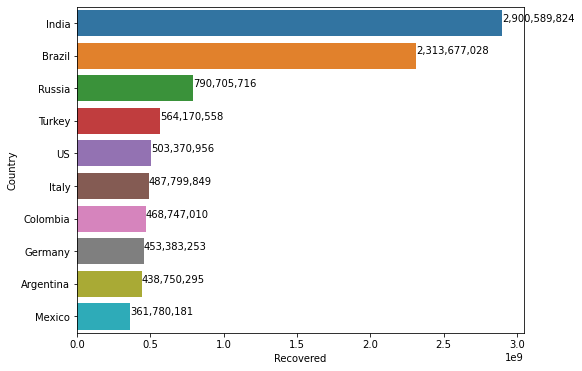

In [12]:
### Top 10 countries with maximum number of recovered cases
top_d10 = world.sort_values(by=['Recovered'], ascending=False).head(10)
### Barplot
plt.figure(figsize=(8,6))
plot = sns.barplot(top_d10['Recovered'], top_d10['Country'])
for i,(value,name) in enumerate(zip(top_d10['Recovered'],top_d10['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [13]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Recovered', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Recovery Rates')
figure.show()